In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns
from sklearn.model_selection import train_test_split
data = pd.read_excel("GHG_March2024.xlsx")

In [8]:
data.info()
df = data.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   References          34 non-null     object 
 1   Year                34 non-null     int64  
 2   Capacity_Factor     34 non-null     float64
 3   Plant_Capacity      34 non-null     float64
 4   DNI                 34 non-null     int64  
 5   Energy_Consumption  34 non-null     float64
 6   Energy_Generation   34 non-null     float64
 7   TES                 34 non-null     float64
 8   Plant_LifeSpan      34 non-null     int64  
 9   Carbon_Intensity    34 non-null     float64
 10  GHG_Emissions       34 non-null     float64
dtypes: float64(7), int64(3), object(1)
memory usage: 3.1+ KB


In [9]:
data

References  Year  Capacity_Factor  \
0                                  Lechon2008  2006             0.71   
1                                  Lechon2008  2006             0.44   
2                              Burkhardt 2011  2008             0.47   
3                              Burkhardt 2011  2008             0.49   
4                              Burkhardt 2011  2010             0.47   
5                              Burkhardt 2011  2010             0.47   
6                             Klein&Ruben2013  2010             0.51   
7                             Klein&Ruben2013  2010             0.33   
8                                Whitaker2013  2012             0.42   
9                         Whitaker2013 boiler  2012             0.42   
10                               Whitaker2013  2012             0.42   
11                        Whitaker2013 boiler  2012             0.42   
12                               Whitaker2013  2012             0.42   
13                        Whitaker2013 boiler  2012             0.42   
14                        Whitaker2013 boiler  2012             0.42   
15                              Asdrubali2013  2012             0.63   
16                              Asdrubali2013  2012             0.36   
17                          Corona et al 2014  2012             0.38   
18                          Corona et al 2014  2012             0.40   
19                          Corona et al 2014  2012             0.42   
20                          Corona et al 2014  2012             0.44   
21                      San Miguel&Corona2014  2012             0.43   
22                      Corona&San Miguel2015  2012             0.38   
23                           Corona2016(full)  2013             0.38   
24  Corona 2016 (socioeconomic&environmental)  2013             0.38   
25                     Corona2016 (HYSOL CSP)  2013             0.91   
26                     Corona2016 (HYSOL CSP)  2013             0.84   
27                     Corona2016 (HYSOL CSP)  2013             0.80   
28                     Corona2016 (HYSOL CSP)  2013             0.91   
29                     Corona2016 (HYSOL CSP)  2013             0.98   
30                     Rodriguez-Serrano 2017  2015             0.45   
31                                   Gasa2021  2016             0.81   
32                         MAND ASTEP system   2023             0.13   
33                          AMTP ASTEP system  2023             0.13   

    Plant_Capacity   DNI  Energy_Consumption  Energy_Generation   TES  \
0           17.000  1997           290199.00           104014.0   7.5   
1           50.000  2016           459573.00           187581.0  16.0   
2          110.000  2920           340000.00           426700.0   6.3   
3          110.000  2920            27000.00           438800.0   6.3   
4          103.000  2700           170680.00           438800.0   6.3   
5          103.000  2700           188684.00           426700.0   6.3   
6          103.000  2700           213350.00           443000.0   6.0   
7          103.000  2700           157879.00           288000.0   6.0   
8          106.000  2600           185447.00           378463.0   6.0   
9          103.000  2700           183481.00           378463.0   6.0   
10         103.000  2700           179214.00           378463.0   6.0   
11         103.000  2700           209083.00           378463.0   6.0   
12         103.000  2700           196282.00           378463.0   6.0   
13         103.000  2700           213350.00           378463.0   6.0   
14         103.000  2700           179214.00           378463.0   6.0   
15          20.000  2100            25300.00           110000.0  15.0   
16          50.000  2100            57600.00           160000.0   7.5   
17          50.000  2030           189946.80           165687.0   7.5   
18          50.000  2030           319165.00           174407.0   7.5   
19          50.000  2030           462083.50          

In [10]:
data.describe()

Year  Capacity_Factor  Plant_Capacity          DNI  \
count    34.000000        34.000000       34.000000    34.000000   
mean   2012.235294         0.499706       76.560294  2386.852941   
std       3.447079         0.205079       34.826291   407.151832   
min    2006.000000         0.130000        0.025000  1497.000000   
25%    2012.000000         0.405000       50.000000  2030.000000   
50%    2012.000000         0.425000      100.000000  2496.500000   
75%    2013.000000         0.505000      103.000000  2700.000000   
max    2023.000000         0.980000      110.000000  3332.000000   

       Energy_Consumption  Energy_Generation        TES  Plant_LifeSpan  \
count        3.400000e+01          34.000000  34.000000       34.000000   
mean         3.092895e+05      356825.208824   8.285294       27.500000   
std          2.736840e+05      236414.436764   3.937168        2.537596   
min          1.351830e+03          27.800000   2.000000       25.000000   
25%          1.792140e+05      167867.000000   6.000000       25.000000   
50%          1.966621e+05      378463.000000   7.500000       27.500000   
75%          4.296798e+05      435775.000000   7.500000       30.000000   
max          1.066154e+06      863804.000000  17.500000       30.000000   

       Carbon_Intensity  GHG_Emissions  
count         34.000000      34.000000  
mean         360.752941      50.683824  
std           87.180298      47.468306  
min          206.500000       3.450000  
25%          301.000000      27.075000  
50%          307.000000      34.600000  
75%          447.400000      45.450000  
max          493.800000     203.000000

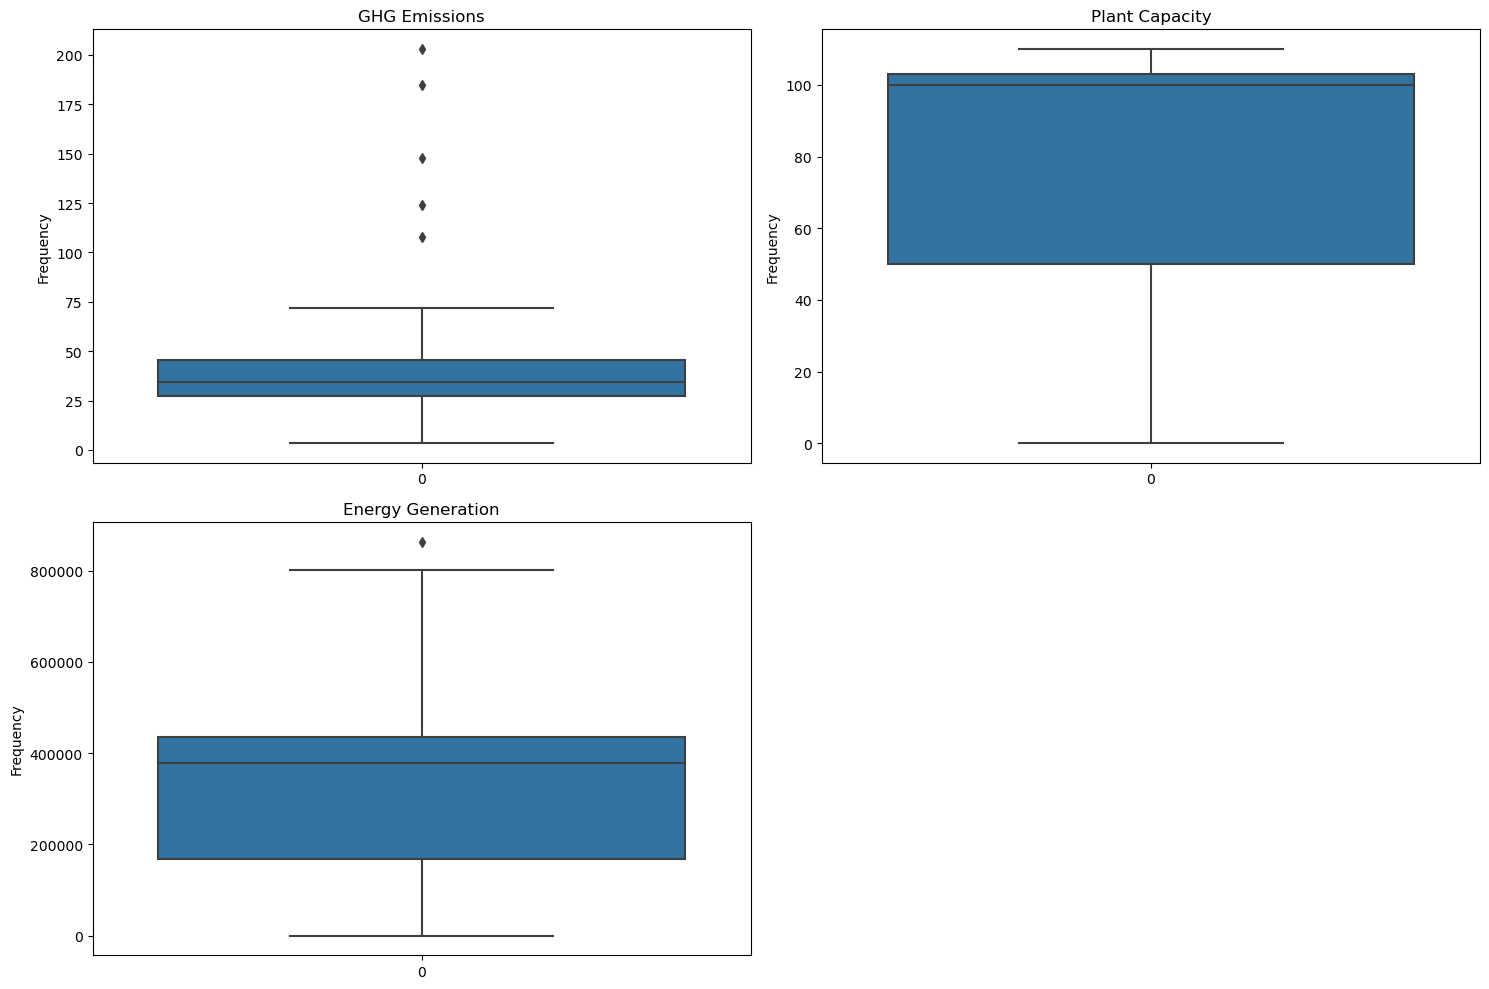

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_combined_subplots(data):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    sns.boxplot(ax=axes[0, 0], data=data["GHG_Emissions"])
    axes[0, 0].set_title("GHG Emissions")
    axes[0, 0].set_ylabel("Frequency")

    sns.boxplot(ax=axes[0, 1], data=data["Plant_Capacity"])
    axes[0, 1].set_title("Plant Capacity")
    axes[0, 1].set_ylabel("Frequency")

    sns.boxplot(ax=axes[1, 0], data=data["Energy_Generation"])
    axes[1, 0].set_title("Energy Generation")
    axes[1, 0].set_ylabel("Frequency")

    # Hide the empty subplot in the second row, second column
    axes[1, 1].axis("off")

    plt.tight_layout()
    plt.show()

plot_combined_subplots(data)

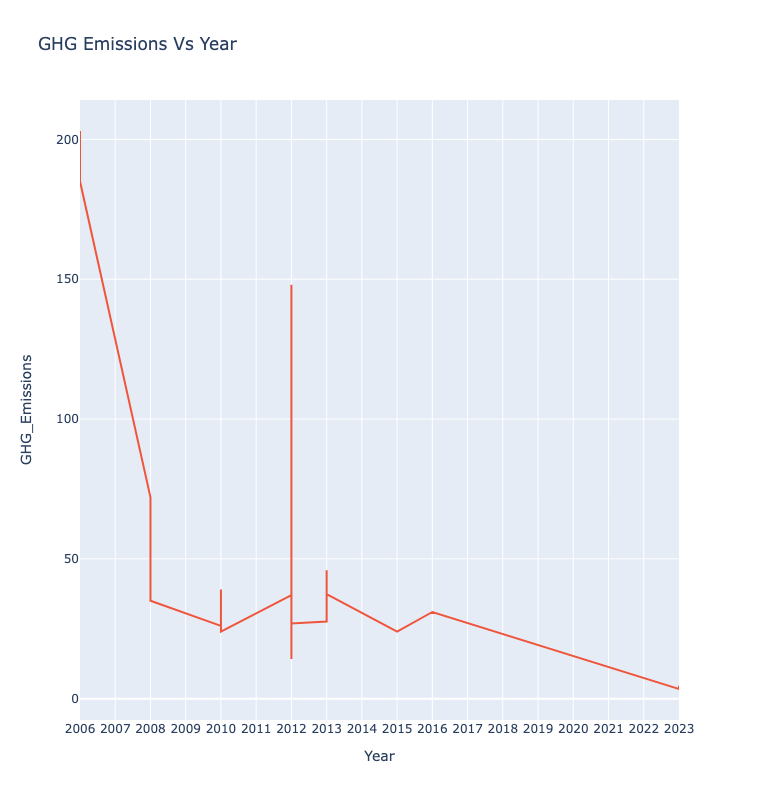

In [12]:
import plotly.express as px

def interactive_plot(df, column, timestamp, title, width=800, height=600):
    '''
    df: dataframe, the dataset.
    column: str, name of column you want to plot
    title: str, title of the plot
    timestamp: str, column of the time for the time series data
    width: int, width of the plot in pixels (default is 800)
    height: int, height of the plot in pixels (default is 600)
    '''
    fig = px.line(title=title)
    fig.add_scatter(x=df[timestamp], y=df[column], name=column)

    fig.update_layout(
        title=title,
        xaxis_title=timestamp,
        yaxis_title=column,
        xaxis=dict(
            tickmode='linear',
            tick0=0,
            dtick=1
        ),
        width=width,
        height=height
    )
    fig.show()

interactive_plot(data, 'GHG_Emissions', 'Year', 'GHG Emissions Vs Year', width=1000, height=800)


   # EDA

In [13]:
data = data.iloc[:,2:].copy()
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Remove Outliers

In [14]:
# Drop rows where 'GHG_Emissions' is below 10 or above 100
data = data[(data['GHG_Emissions'] > 15) & (data['GHG_Emissions'] < 60) &(data["Energy_Generation"]>27) & (data["Plant_Capacity"]>1)]

In [15]:
data.shape

(24, 9)

In [16]:
data.describe()

Capacity_Factor  Plant_Capacity          DNI  Energy_Consumption  \
count        24.000000       24.000000    24.000000        2.400000e+01   
mean          0.532917       91.916667  2530.000000        3.133773e+05   
std           0.208274       22.123992   339.872738        2.969997e+05   
min           0.330000       50.000000  2026.000000        2.700000e+04   
25%           0.410000      100.000000  2175.000000        1.792140e+05   
50%           0.420000      103.000000  2693.500000        1.940738e+05   
75%           0.582500      103.000000  2700.000000        2.133500e+05   
max           0.980000      110.000000  3332.000000        1.066154e+06   

       Energy_Generation        TES  Plant_LifeSpan  Carbon_Intensity  \
count          24.000000  24.000000       24.000000         24.000000   
mean       440041.479167   8.454167       27.916667        380.141667   
std        223399.977143   3.731299        2.518051         83.881935   
min        147821.500000   5.000000       25.000000        272.800000   
25%        355847.250000   6.000000       25.000000        301.000000   
50%        378463.000000   6.300000       30.000000        377.200000   
75%        507756.500000   9.125000       30.000000        447.400000   
max        863804.000000  17.500000       30.000000        493.800000   

       GHG_Emissions  
count      24.000000  
mean       33.075000  
std         7.010381  
min        20.600000  
25%        27.425000  
50%        33.500000  
75%        37.550000  
max        45.900000

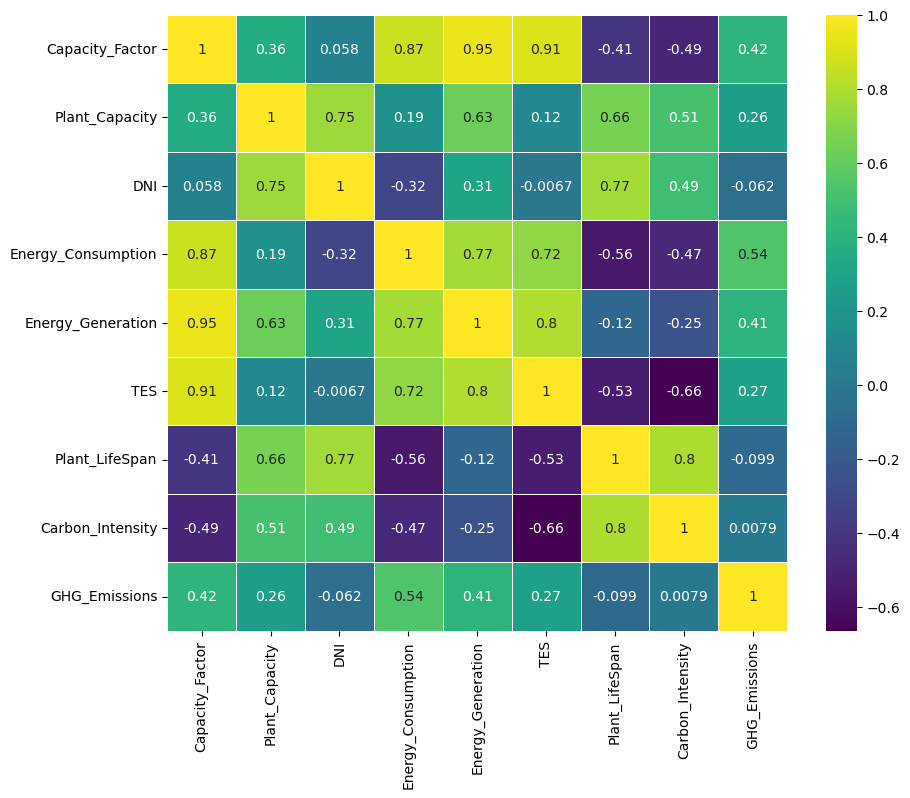

In [17]:
# Pearson's Corrrelation Plot with Seaborn
fig, ax = plt.subplots(figsize=(10,8))  # Sample figsize in inches
sns.heatmap(data.corr(method='pearson'), annot=True, linewidths=.5, ax=ax, cmap='viridis');

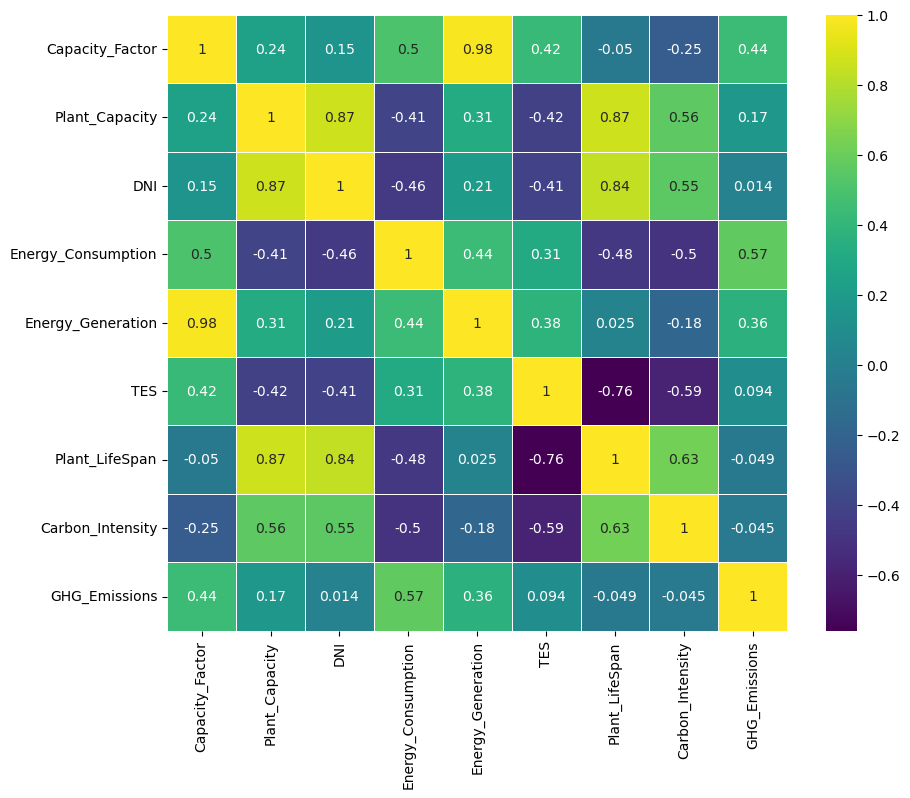

In [18]:
# spearman's Corrrelation Plot with Seaborn
fig, ax = plt.subplots(figsize=(10,8))  # Sample figsize in inches
sns.heatmap(data.corr(method='spearman'), annot=True, linewidths=.5, ax=ax, cmap="viridis");

   # BUILDING MODEL TO PREDICT GHG-Emission

standardizing the dataset

In [19]:
from sklearn.preprocessing import MinMaxScaler


# Select the columns to be scaled and standardized
columns_to_scale = ['Capacity_Factor', 'Plant_Capacity', 'DNI', 'Energy_Consumption', 'Energy_Generation', 'TES', 'Plant_LifeSpan', 'Carbon_Intensity'] 
# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

In [20]:
data

Capacity_Factor  Plant_Capacity       DNI  Energy_Consumption  \
2          0.723077        0.833333  0.281011            0.586763   
3          0.784615        0.833333  0.506126            0.509981   
4          0.138462        0.933333  0.439510            0.152477   
5          0.076923        0.000000  0.133231            0.163269   
7          0.138462        0.883333  0.516080            0.162904   
9          0.138462        0.883333  0.516080            0.150585   
11         0.215385        0.883333  0.516080            0.138266   
12         0.046154        0.000000  0.056662            0.029447   
13         0.076923        0.000000  0.003063            0.156807   
14         0.215385        0.883333  0.516080            0.155592   
15         0.138462        0.883333  0.516080            0.179329   
16         0.138462        0.883333  0.516080            0.175222   
19         0.184615        0.833333  0.439510            0.164413   
20         0.246154        1.000000  0.684533            0.000000   
21         1.000000        0.833333  0.505360            0.848500   
22         0.076923        0.000000  0.003063            0.163269   
23         0.738462        1.000000  1.000000            0.142424   
24         0.076923        0.000000  0.003063            0.158654   
26         0.892308        0.833333  0.045942            1.000000   
27         0.276923        0.883333  0.516080            0.179329   
30         0.000000        0.883333  0.516080            0.125948   
31         0.138462        0.883333  0.516080            0.146479   
32         0.138462        0.883333  0.516080            0.146479   
33         0.892308        0.833333  0.000000            0.977952   

    Energy_Generation    TES  Plant_LifeSpan  Carbon_Intensity  GHG_Emissions  
2            0.774048  0.720             0.0          0.127602           34.2  
3            0.821124  0.720             0.0          0.127602           28.8  
4            0.322133  0.080             1.0          0.790045           37.0  
5            0.000000  0.200             0.0          0.127602           45.5  
7            0.322133  0.080             1.0          0.790045           38.0  
9            0.322133  0.080             1.0          0.790045           34.0  
11           0.406404  0.104             1.0          0.923982           26.0  
12           0.017009  0.200             0.0          0.154751           20.6  
13           0.024952  0.200             0.0          0.154751           26.6  
14           0.389505  0.104             1.0          0.923982           28.0  
15           0.322133  0.080             1.0          0.790045           38.0  
16           0.322133  0.080             1.0          0.790045           36.0  
19           0.346207  0.000             1.0          0.073303           24.0  
20           0.406404  0.104             1.0          1.000000           35.0  
21           1.000000  0.720             0.0          0.127602           37.4  
22           0.024952  0.200             0.0          0.127602           27.6  
23           0.877701  1.000             1.0          0.000000           31.0  
24           0.024952  0.200             0.0          0.154751           26.9  
26           0.907287  0.720             0.0          0.127602           45.9  
27           0.412271  0.080             1.0          0.923982           39.0  
30           0.195785  0.080             1.0          0.923982           24.0  
31           0.322133  0.080             1.0          0.790045           33.0  
32           0.322133  0.080             1.0          0.790045           32.0  
33           0.911790  0.720             0.0          0.127602           45.3

In [21]:
X = data.iloc[:,:-1]
y = data.iloc[:, -1]

### funtion to plot the actual and predicted values by the models

In [22]:
# Create a dataframe of the actual and predicted values for visualization
def val_df(actual, y_pred):
    df_prediction = pd.DataFrame()
    df_prediction["Actual"] = y_test
    df_prediction["Prediction"] = y_pred
    # df_prediction.set_index(df_prediction.index, inplace=True)
    return df_prediction

# Function to plot interactive plots using Plotly Express
def interactive_plot2(data, title):
    fig = px.line(title=title)
    for i in data.columns:
        fig.add_scatter(x=data.index, y=data[i], name=i)
        fig.show()

In [23]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state=42)

# Ridge Regression

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error

def train_and_evaluate_ridge_model(X_train, X_test, y_train, y_test, alpha=20.0):
    # Feature Engineering
    poly = PolynomialFeatures(degree=2, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Data Preprocessing
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_poly)
    X_test_scaled = scaler.transform(X_test_poly)

    # Model Training
    ridge = Ridge(alpha=alpha)  # Increased alpha for stronger regularization
    ridge.fit(X_train_scaled, y_train)

    # Model Evaluation
    y_pred_train = ridge.predict(X_train_scaled)
    y_pred_test = ridge.predict(X_test_scaled)

    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)

    train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
    test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)

    print("Train R^2 score:", train_r2)
    print("Test R^2 score:", test_r2)
    print("Train RMSE:", train_rmse)
    print("Test RMSE:", test_rmse)

    return ridge, y_pred_test

# usage
ridge_model, y_pred_test_rg = train_and_evaluate_ridge_model(X_train, X_test, y_train, y_test)

Train R^2 score: 0.299734982446091
Test R^2 score: 0.7471127840783934
Train RMSE: 5.779068841362515
Test RMSE: 3.2331008858045327


/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [25]:
val_df(y_test, y_pred_test_rg)

Actual  Prediction
13    26.6   30.032922
23    31.0   27.127462
2     34.2   34.810287
26    45.9   42.232531
16    36.0   32.585264

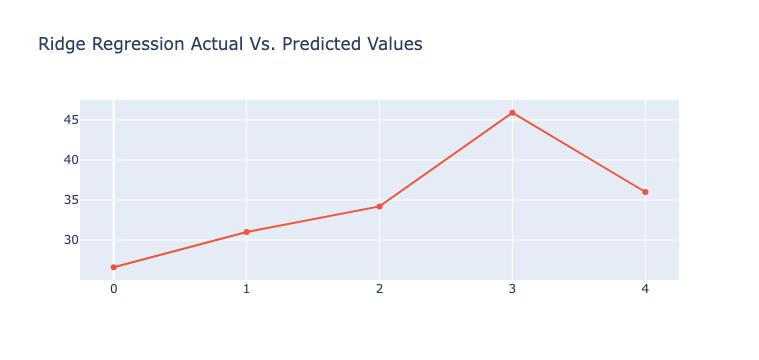

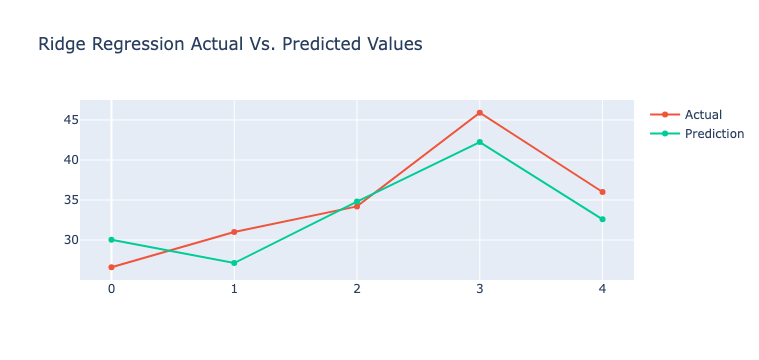

In [26]:
interactive_plot2(val_df(y_test, y_pred_test_rg).reset_index(drop= True),"Ridge Regression Actual Vs. Predicted Values")

# Random Forest

In [27]:
def train_and_evaluate_rf(X_train_scaled, X_test_scaled, y_train, y_test, n_estimators=100, random_state=42):
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import r2_score, mean_squared_error

    # Model Training
    rf = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state)
    rf.fit(X_train_scaled, y_train)

    # Model Evaluation
    y_pred_train_rf = rf.predict(X_train_scaled)
    y_pred_test_rf = rf.predict(X_test_scaled)

    train_r2_rf = r2_score(y_train, y_pred_train_rf)
    test_r2_rf = r2_score(y_test, y_pred_test_rf)

    train_rmse_rf = mean_squared_error(y_train, y_pred_train_rf, squared=False)
    test_rmse_rf = mean_squared_error(y_test, y_pred_test_rf, squared=False)

    print("Random Forest Regressor:")
    print("Train R^2 score:", train_r2_rf)
    print("Test R^2 score:", test_r2_rf)
    print("Train RMSE:", train_rmse_rf)
    print("Test RMSE:", test_rmse_rf)

    return rf, y_pred_test_rf

# Example usage
rf_model, y_pred_test_rf = train_and_evaluate_rf(X_train, X_test, y_train, y_test)

Random Forest Regressor:
Train R^2 score: 0.8269675870974166
Test R^2 score: 0.7297547079430242
Train RMSE: 2.872700726652928
Test RMSE: 3.3422188737423917


/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [28]:
val_df(y_test, y_pred_test_rf)

Actual  Prediction
13    26.6      27.997
23    31.0      30.987
2     34.2      33.905
26    45.9      38.744
16    36.0      37.614

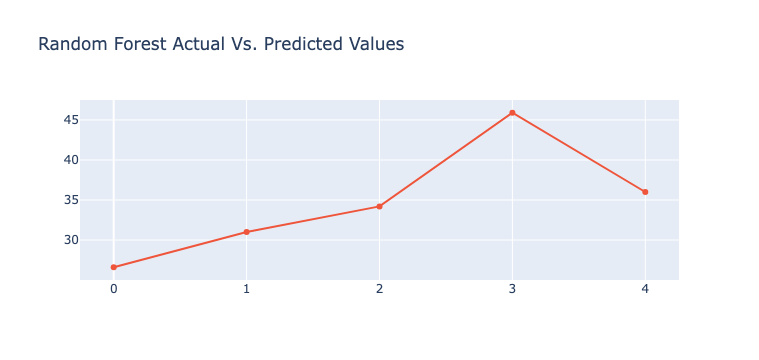

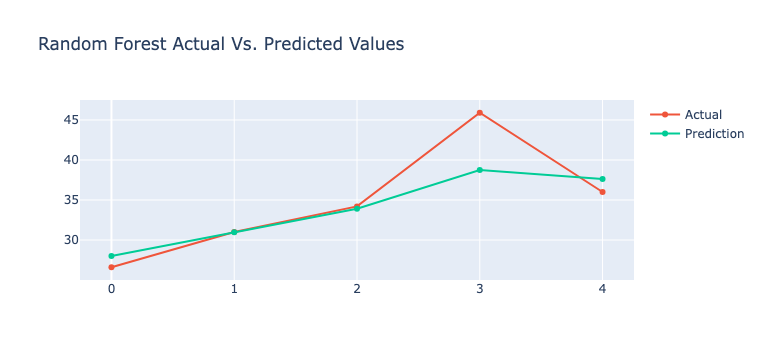

In [29]:
interactive_plot2(val_df(y_test, y_pred_test_rf).reset_index(drop= True),"Random Forest Actual Vs. Predicted Values")

# Gradient Boosting

In [30]:
def train_and_evaluate_gb(X_train_scaled, X_test_scaled, y_train, y_test, n_estimators=100, random_state=42):
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.metrics import r2_score, mean_squared_error

    # Model Training
    gb = GradientBoostingRegressor(n_estimators=n_estimators, random_state=random_state)
    gb.fit(X_train_scaled, y_train)

    # Model Evaluation
    y_pred_train_gb = gb.predict(X_train_scaled)
    y_pred_test_gb = gb.predict(X_test_scaled)

    train_r2_gb = r2_score(y_train, y_pred_train_gb)
    test_r2_gb = r2_score(y_test, y_pred_test_gb)

    train_rmse_gb = mean_squared_error(y_train, y_pred_train_gb, squared=False)
    test_rmse_gb = mean_squared_error(y_test, y_pred_test_gb, squared=False)

    print("\nGradient Boosting Regressor:")
    print("Train R^2 score:", train_r2_gb)
    print("Test R^2 score:", test_r2_gb)
    print("Train RMSE:", train_rmse_gb)
    print("Test RMSE:", test_rmse_gb)

    return gb, y_pred_test_gb

# Example usage
gb_model, y_pred_test_gb = train_and_evaluate_gb(X_train, X_test, y_train, y_test)



Gradient Boosting Regressor:
Train R^2 score: 0.9992821195785939
Test R^2 score: 0.8531135595360788
Train RMSE: 0.18503449825081808
Test RMSE: 2.4640338643598025


/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [31]:
val_df(y_test, y_pred_test_gb)

Actual  Prediction
13    26.6   27.029806
23    31.0   32.224958
2     34.2   30.391460
26    45.9   42.818903
16    36.0   38.161926

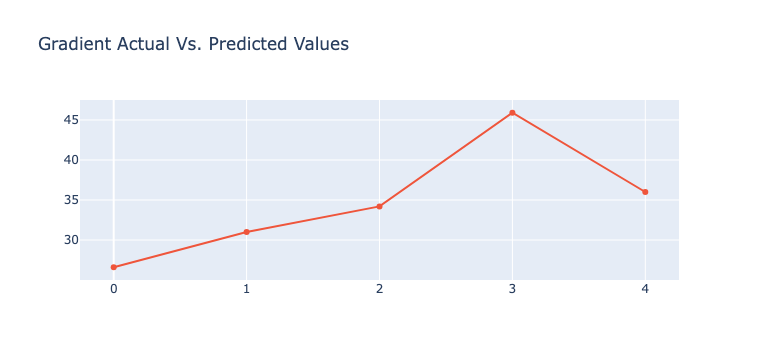

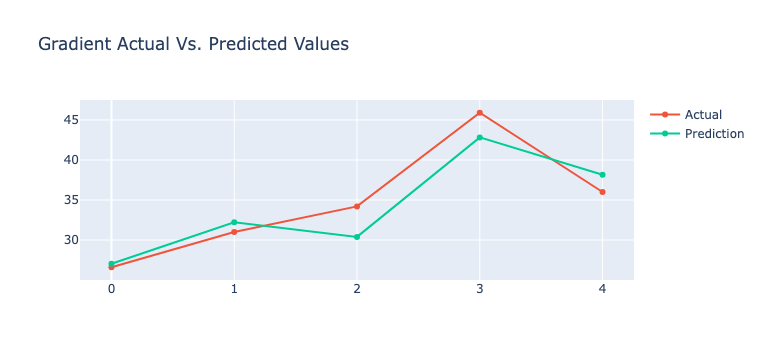

In [32]:
interactive_plot2(val_df(y_test, y_pred_test_gb).reset_index(drop= True),"Gradient Actual Vs. Predicted Values")

# Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

def train_and_evaluate_lr(X_train, X_test, y_train, y_test):
    # Step 3: Train the linear regression model
    lr = LinearRegression()
    lr.fit(X_train, y_train)

    # Step 4: Evaluate the model
    y_pred_train = lr.predict(X_train)
    y_pred_test_lr = lr.predict(X_test)

    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test_lr)

    train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
    test_rmse = mean_squared_error(y_test, y_pred_test_lr, squared=False)

    print("Train R^2 score:", train_r2)
    print("Test R^2 score:", test_r2)
    print("Train RMSE:", train_rmse)
    print("Test RMSE:", test_rmse)

    return lr, y_pred_test_lr

# Example usage
lr_model, y_pred_test_lr = train_and_evaluate_lr(X_train, X_test, y_train, y_test)

Train R^2 score: 0.6438553381502146
Test R^2 score: 0.6204945538344521
Train RMSE: 4.121353548342509
Test RMSE: 3.9606350392311107


/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [34]:
val_df(y_test,y_pred_test_lr)

Actual  Prediction
13    26.6   30.546921
23    31.0   35.682866
2     34.2   29.115778
26    45.9   46.254792
16    36.0   32.133407

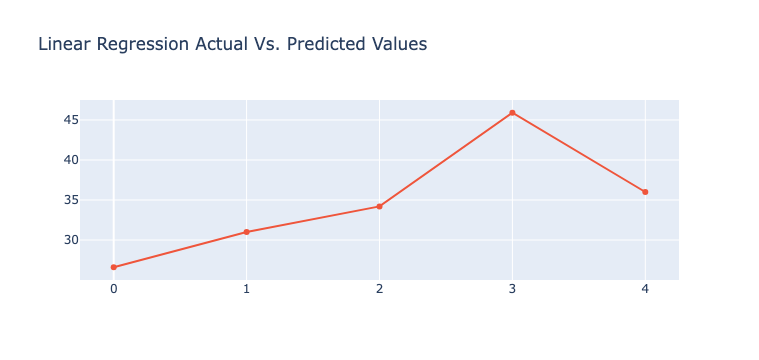

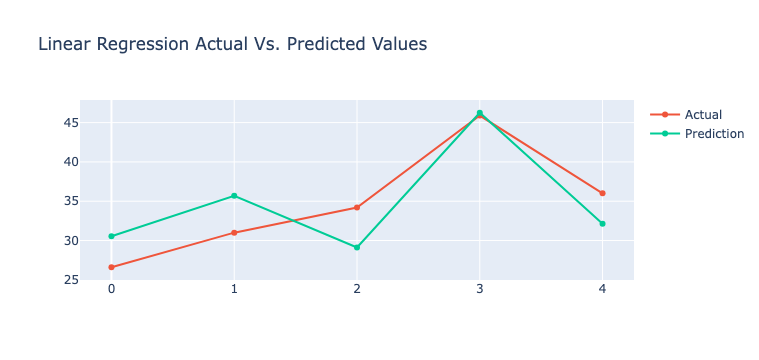

In [35]:
interactive_plot2(val_df(y_test, y_pred_test_lr).reset_index(drop= True),"Linear Regression Actual Vs. Predicted Values")

# Feature Importance Analysis

In [36]:
def plot_feature_importances(model, X):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        importances = np.abs(model.coef_)
    else:
        raise ValueError("Model does not have attribute 'feature_importances_' or 'coef_'.")

    # Get feature names
    feature_names = X.columns.tolist()

    # Sort indices based on importances
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")
    for f in range(X.shape[1]):
        print("%d. feature %d (%f) - %s" % (f + 1, indices[f], importances[indices[f]], feature_names[indices[f]]))

    # Plot the feature importances
    plt.figure(figsize=(8, 6))
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
            color="b", align="center")
    plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation='vertical')
    plt.xlim([-1, X.shape[1]])
    plt.tight_layout()
    plt.show()

**Linear Regression**

Feature ranking:
1. feature 4 (329.454766) - Energy_Generation
2. feature 0 (274.922817) - Capacity_Factor
3. feature 1 (48.165628) - Plant_Capacity
4. feature 6 (38.078932) - Plant_LifeSpan
5. feature 3 (35.134399) - Energy_Consumption
6. feature 5 (24.315694) - TES
7. feature 7 (6.614072) - Carbon_Intensity
8. feature 2 (0.037880) - DNI


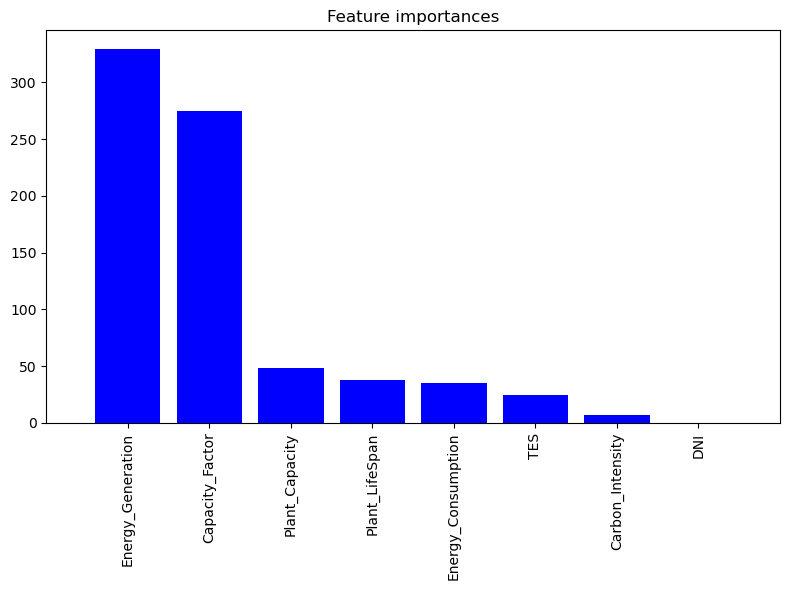

In [37]:
# Plot feature importances for Gradient Boosting Regressor
plot_feature_importances(lr_model, X)

**Ridge Regression**

['Capacity_Factor', 'Plant_Capacity', 'DNI', 'Energy_Consumption', 'Energy_Generation', 'TES', 'Plant_LifeSpan', 'Carbon_Intensity']
Feature ranking:
1. feature 0 (0.196649) - Capacity_Factor
2. feature 1 (0.046269) - Plant_Capacity
3. feature 2 (0.003533) - DNI
4. feature 3 (0.558226) - Energy_Consumption
5. feature 4 (0.012134) - Energy_Generation
6. feature 5 (0.052622) - TES
7. feature 6 (0.121722) - Plant_LifeSpan
8. feature 7 (0.159852) - Carbon_Intensity


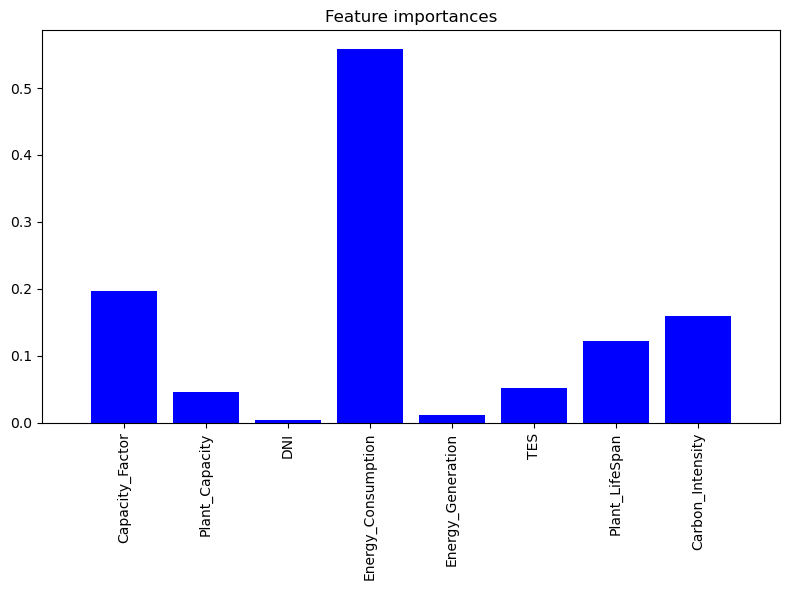

In [38]:
def plot_feature_importances(model, X):
    if hasattr(model, 'coef_'):
        importances = np.abs(model.coef_)
    else:
        raise ValueError("Model does not have attribute 'coef_'.")

    # Get feature names
    feature_names = X.columns.tolist()
    print(feature_names)
    # Sort indices based on importances
    indices = np.argsort(importances)[::-1]
    # Print the feature ranking
    print("Feature ranking:")
    for f in range(X.shape[1]):
        print("%d. feature %d (%f) - %s" % (f + 1, f, importances[f], feature_names[f]))

    # Plot the feature importances
    plt.figure(figsize=(8, 6))
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[:X.shape[1]],
            color="b", align="center")
    plt.xticks(range(X.shape[1]), feature_names, rotation='vertical')
    plt.xlim([-1, X.shape[1]])
    plt.tight_layout()
    plt.show()

# Plot feature importances for Ridge regression model
plot_feature_importances(ridge_model, X)

**Gradient Boosting Regresor**

Feature ranking:
1. feature 0 (0.280336) - Capacity_Factor
2. feature 4 (0.070456) - Plant_Capacity
3. feature 3 (0.119066) - DNI
4. feature 2 (0.174299) - Energy_Consumption
5. feature 1 (0.222960) - Energy_Generation
6. feature 5 (0.069175) - TES
7. feature 7 (0.000000) - Plant_LifeSpan
8. feature 6 (0.063707) - Carbon_Intensity


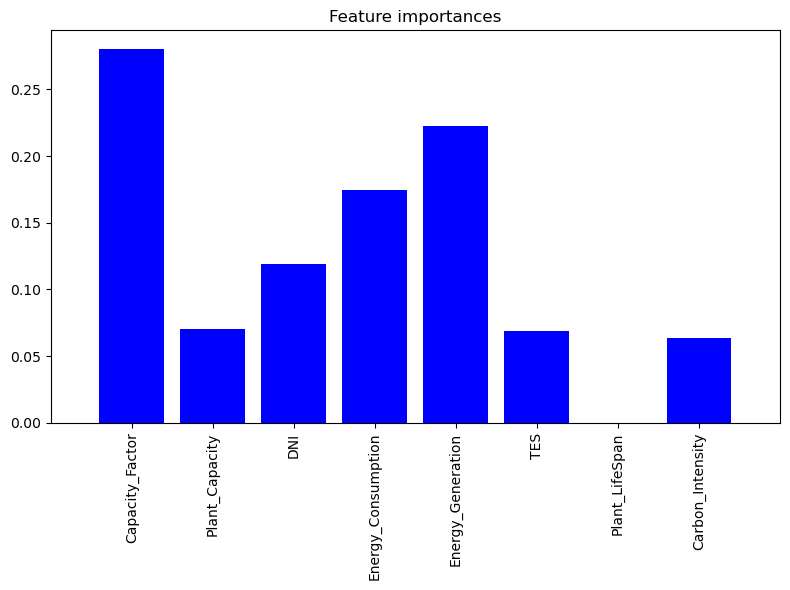

In [39]:
def plot_feature_importances(model, X):
    if hasattr(model, 'coef_'):
        importances = np.abs(model.coef_)
    elif hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    else:
        raise ValueError("Model does not have attribute 'coef_' or 'feature_importances_'.")
    
    # Get feature names
    feature_names = X.columns.tolist()

    # Sort indices based on importances
    indices = np.argsort(importances)[::-1][:8]
    importances = importances[:8]
    # Print the feature ranking
    print("Feature ranking:")
    for f in range(X.shape[1]):
        print("%d. feature %d (%f) - %s" % (f + 1, indices[f], importances[f], feature_names[f]))
    # Plot the feature importances
    plt.figure(figsize=(8, 6))
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[:X.shape[1]],
            color="b", align="center")
    
    tick_positions = np.arange(8)
    plt.xticks(tick_positions,feature_names, rotation='vertical')
    plt.xlim([-1, X.shape[1]])
    plt.tight_layout()
    plt.show()

# Plot feature importances for Gradient Boosting Regressor
plot_feature_importances(gb_model, X)


**Random Forest Regressor**

Feature ranking:
1. feature 3 (0.128152) - Capacity_Factor
2. feature 4 (0.046440) - Plant_Capacity
3. feature 0 (0.111245) - DNI
4. feature 2 (0.369230) - Energy_Consumption
5. feature 7 (0.204562) - Energy_Generation
6. feature 5 (0.061474) - TES
7. feature 1 (0.011182) - Plant_LifeSpan
8. feature 6 (0.067714) - Carbon_Intensity


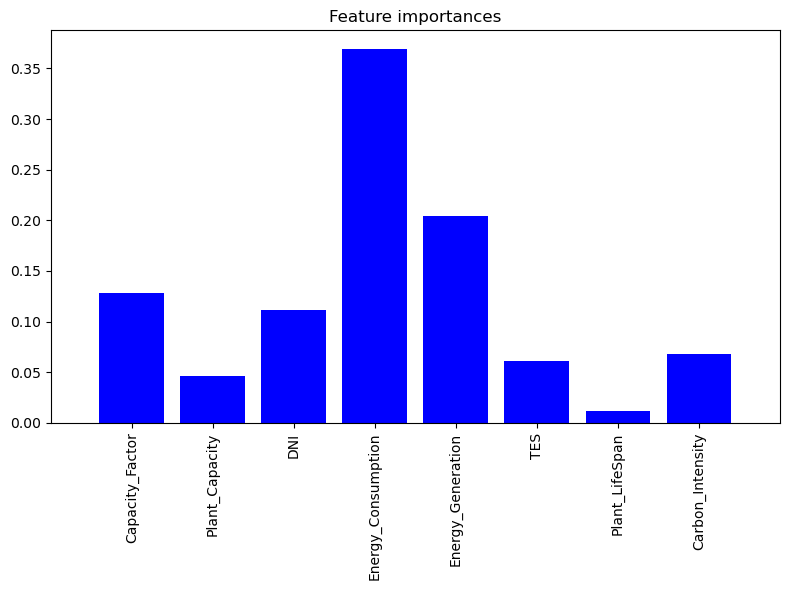

In [40]:
plot_feature_importances(rf_model, X)

# Comparative Analysis Chart

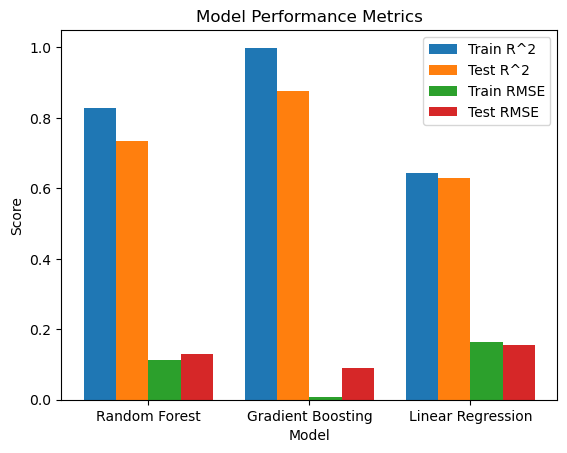

In [41]:
import matplotlib.pyplot as plt

# Data
models = ['Random Forest', 'Gradient Boosting', 'Linear Regression']
train_r2 = [0.82859, 0.99928, 0.643855]
test_r2 = [0.734576, 0.875981, 0.62899]
train_rmse = [0.11301, 0.00731, 0.162899]
test_rmse = [0.130919, 0.089491, 0.156546]

# Plotting
x = range(len(models))
width = 0.2

fig, ax = plt.subplots()
ax.bar(x, train_r2, width, label='Train R^2')
ax.bar([i + width for i in x], test_r2, width, label='Test R^2')
ax.bar([i + 2*width for i in x], train_rmse, width, label='Train RMSE')
ax.bar([i + 3*width for i in x], test_rmse, width, label='Test RMSE')

ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Model Performance Metrics')
ax.set_xticks([i + 1.5*width for i in x])
ax.set_xticklabels(models)
ax.legend()

plt.show()


# Buiding the Model With The Entire Dataset

In [42]:
# Select the columns to be scaled and standardized
columns_to_scale = ['Capacity_Factor', 'Plant_Capacity', 'DNI', 'Energy_Consumption', 'Energy_Generation', 'TES', 'Plant_LifeSpan', 'Carbon_Intensity'] 

In [43]:
# # Select the columns to be scaled and standardized
# columns_to_scal = ['Capacity_Factor', 'Plant_Capacity', 'Energy_Consumption', 'Energy_Generation', 'GHG_Emissions']
# print(list(data.columns))
# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
print(list(df.columns))

['References', 'Year', 'Capacity_Factor', 'Plant_Capacity', 'DNI', 'Energy_Consumption', 'Energy_Generation', 'TES', 'Plant_LifeSpan', 'Carbon_Intensity', 'GHG_Emissions']


In [44]:
df.drop(["References","Year",], axis =1, inplace = True)
X = df.iloc[:,:-1]
y = df.iloc[:, -1]

In [45]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

# Ridge Regression

In [46]:
ridge_model, y_pred_test_rg = train_and_evaluate_ridge_model(X_train, X_test, y_train, y_test)

Train R^2 score: 0.6726678690025394
Test R^2 score: -0.44312489321597637
Train RMSE: 27.713194273741152
Test RMSE: 47.102124614839894


/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



# Random Forest

In [47]:
rf_model, y_pred_test_rf = train_and_evaluate_rf(X_train, X_test, y_train, y_test)

Random Forest Regressor:
Train R^2 score: 0.8904127350940343
Test R^2 score: 0.7774719358464535
Train RMSE: 16.035123578353485
Test RMSE: 18.496132716550587


/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [48]:
val_df(y_pred_test_rf,y_test)

Actual  Prediction
15    14.2        14.2
19   108.0       108.0
27    34.2        34.2
26    28.8        28.8
8     37.0        37.0
24    45.5        45.5
21   124.0       124.0

# Gradient Boosting

In [49]:
gb_model, y_pred_test_gb = train_and_evaluate_gb(X_train, X_test, y_train, y_test)


Gradient Boosting Regressor:
Train R^2 score: 0.9999706907792393
Test R^2 score: 0.8212904815181279
Train RMSE: 0.2622372629362113
Test RMSE: 16.57533751052686


/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [50]:
val_df(y_pred_test_gb,y_test)

Actual  Prediction
15    14.2        14.2
19   108.0       108.0
27    34.2        34.2
26    28.8        28.8
8     37.0        37.0
24    45.5        45.5
21   124.0       124.0

# Linear Regression

In [51]:
lr_model, y_pred_test_lr = train_and_evaluate_lr(X_train, X_test, y_train, y_test)

Train R^2 score: 0.9423769382160612
Test R^2 score: -2.1400991222314367
Train RMSE: 11.627609355359304
Test RMSE: 69.4800651144209


/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [52]:
val_df(y_pred_test_lr,y_test)

Actual  Prediction
15    14.2        14.2
19   108.0       108.0
27    34.2        34.2
26    28.8        28.8
8     37.0        37.0
24    45.5        45.5
21   124.0       124.0

# Processing the dataset for the smaller plants

In [53]:
small_plant = df.iloc[32:,:]

In [54]:
small_plant

Capacity_Factor  Plant_Capacity       DNI  Energy_Consumption  \
32              0.0             0.0  0.155858            0.000000   
33              0.0             0.0  0.000000            0.000413   

    Energy_Generation  TES  Plant_LifeSpan  Carbon_Intensity  GHG_Emissions  
32                0.0  0.0             1.0               0.0           3.45  
33                0.0  0.0             1.0               0.0           4.60

In [55]:
small_test = small_plant.iloc[:,:-1]

In [56]:
small_test

Capacity_Factor  Plant_Capacity       DNI  Energy_Consumption  \
32              0.0             0.0  0.155858            0.000000   
33              0.0             0.0  0.000000            0.000413   

    Energy_Generation  TES  Plant_LifeSpan  Carbon_Intensity  
32                0.0  0.0             1.0               0.0  
33                0.0  0.0             1.0               0.0

In [57]:
small_pred = gb_model.predict(small_test)

In [58]:
small_pred

array([3.53730387, 4.50994036])

# Test Case

In [82]:
real_data = {"Capacity_Factor":22, "Plant_Capacity":31,"DNI":44,"Energy_Consumption":30,"Energy_Generation":13,"TES":12,"Plant_LifeSpan":23,"Carbon_Intensity":120}
real_data = pd.DataFrame.from_dict(real_data, orient = 'index')
real_data = real_data.T
real_data

Capacity_Factor  Plant_Capacity  DNI  Energy_Consumption  \
0               22              31   44                  30   

   Energy_Generation  TES  Plant_LifeSpan  Carbon_Intensity  
0                 13   12              23               120

In [85]:
# Fit and transform the selected columns
real_data[columns_to_scale] = scaler.fit_transform(real_data[columns_to_scale])

In [88]:
real_data

Capacity_Factor  Plant_Capacity  DNI  Energy_Consumption  \
0              0.0             0.0  0.0                 0.0   

   Energy_Generation  TES  Plant_LifeSpan  Carbon_Intensity  
0                0.0  0.0             0.0               0.0

In [86]:
test_pred = gb_model.predict(real_data)

In [87]:
print(f"The GHG values is {test_pred[0]}")

The GHG values is 5.047352409864579
